<a href="https://colab.research.google.com/github/RoyElkabetz/SEOP-and-NMR/blob/main/PID_and_LIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import time

np.random.seed(216)

The PID equation is given by

\begin{align}
    MV_k &= \overline{MV} + K_P \epsilon_k + K_I \sum_{k'=0}^{k}\epsilon_{k'}\left(t_k - t_{k-1}\right) + K_D \frac{\epsilon_k - \epsilon_{k-1}}{t_k - t_{k-1}}
\end{align}

In [92]:
class PIDcontroller:
    def __init__(self, Kp, Ki, Kd, MV_bar=0, beta=1 ,gamma=0):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.MV_bar = MV_bar
        self.beta = beta
        self.gamma = gamma

    def lock(self):
        # initialize stored data
        eD_prev = 0
        t_prev = -1000
        P = 0
        I = 0
        D = 0
        
        # initial control
        MV = self.MV_bar
        
        while True:
            # # yield MV, wait for new t, SP, PV, TR
            # t, PV, SP, TR = yield MV
            
            # # adjust I term so output matches tracking input
            # I = TR - MV_bar - P - D

            t, PV, SP = yield MV

            
            # PID calculations
            P = self.Kp * (self.beta *  SP - PV)
            I = I + self.Ki * (SP - PV) * (t - t_prev)
            eD = self.gamma * SP - PV
            D = self.Kd * (eD - eD_prev) / (t - t_prev)
            MV = self.MV_bar + P + I + D
            
            # update stored data for next iteration
            eD_prev = eD
            t_prev = t

In [93]:
tf = 100
time = np.linspace(0, tf, tf * 10)
setpoint = [0 if t < tf / 2 else 10 for t in time]
temperature = [5] * len(time) + np.random.rand(len(time))

In [105]:
pid_controller = PIDcontroller(1, 0.01, 0)
pid = pid_controller.lock()
pid.send(None)
for i, t in enumerate(time[:-1]):
    SP = setpoint[i]
    PV = temperature[i]
    MV = pid.send([t, PV, SP])
    temperature[i + 1] = 0.9 * MV

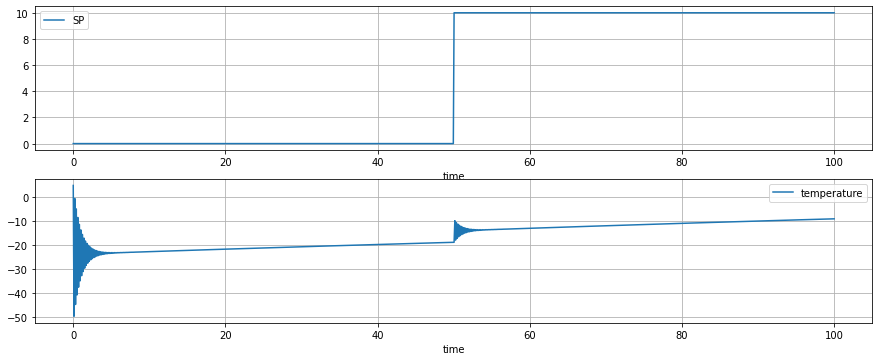

In [106]:
fig = plt.figure(figsize=(15, 9))
ax1 = plt.subplot(311)
ax1.plot(time, setpoint, label="SP")
ax1.set_xlabel('time')
ax1.legend()
ax1.grid()

ax2 = plt.subplot(312)
ax2.plot(time, temperature, label="temperature")
ax2.set_xlabel('time')
ax2.legend()
ax2.grid()